# 第九次课-评分作业

**此次作业<span style="color:red;">成绩计入总评</span>，基础题满分10分，选做题满分1分，选做题共两道，分别为1分，选做任意一道即可，若都做则按得分更高的一道给分**

**请将作业命名为<span style="color:red;">HW09-评分作业+姓名+学号.ipynb</span>, 并于<span style="color:red;">4月4日23:59前</span>提交，做附加题的同学请于<span style="color:red;">4月2日23:59前</span>提交，晚于此时间提交的作业，附加题部分不予批改**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 第一部分、`pandas`与可视化基础（4pt）

本部分中使用`StudentStressFactor.csv`数据集回顾`pandas`表处理与`matplotlib`可视化的基本操作，数据来源[Kaggle](https://www.kaggle.com/datasets/samyakb/student-stress-factors)

在本部分中，你所实现的结果在**数值上**应与参考输出**完全一致**

In [58]:
df_stustress = pd.read_csv('StudentStressFactors.csv', encoding='utf-8')
display(df_stustress.head())

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


### 1.1 将列`How would you rate your stress levels?`设为索引，并计算每一压力等级(stress level)对应的其他指标的均值和标准差（1pt）

In [59]:
# TODO (1pt)
stress = df_stustress.groupby('How would you rate your stress levels?')
info = stress.describe() # 利用describe计算各项统计值
result = info.loc[:, info.columns.get_level_values(1).isin(['mean', 'std'])] # 从info中提取出需要的条目，注意索引方式
display(result)

Kindly Rate your Sleep Quality 😴  \
                                                                   mean   
How would you rate your stress levels?                                    
1                                                              3.136364   
2                                                              2.857143   
3                                                              2.960000   
4                                                              3.050000   
5                                                              3.812500   

                                                  \
                                             std   
How would you rate your stress levels?             
1                                       1.184590   
2                                       1.130253   
3                                       0.776676   
4                                       1.250252   
5                                       0.887234   

                                       How many times a week do you suffer headaches 🤕?  \
                                                                                   mean   
How would you rate your stress levels?                                                    
1                                                                              2.545455   
2                                                                              2.238095   
3                                                                              1.840000   
4                                                                              1.900000   
5                                                                              2.500000   

                                                  \
                                             std   
How would you rate your stress levels?             
1                                       1.536327   
2                                       1.113931   
3                                       0.928057   
4                                       0.893297   
5                                       1.550827   

                                       How would you rate you academic performance 👩‍🎓?  \
                                                                                   mean   
How would you rate your stress levels?                                                    
1                                                                              3.227273   
2                                                                              3.190476   
3                                                                              3.480000   
4                                                                              3.400000   
5                                                                              3.312500   

                                                  \
                                             std   
How would you rate your stress levels?             
1                                       1.385767   
2                                       0.961722   
3                                       0.988645   
4                                       0.804030   
5                                       1.050542   

                                       how would you rate your study load?  \
                                                                      mean   
How would you rate your stress levels?                                       
1                                                                 2.090909   
2                                                                 2.142857   
3                                                                 3.160000   
4                                                                 2.750000   
5                                                                 3.812500   

                                                  \
                                             std   


### 1.2 统计各个压力等级中，认为自己学习负担(study load)较高(4\~5)与较低(1\~2)的人数，并计算它们的比值，保存在一个新的`DataFrame`中（1pt）

In [60]:
# TODO (1pt)
study_load = df_stustress.groupby(['How would you rate your stress levels?',
                                    'how would you rate your study load?'])['how would you rate your study load?']
count = study_load.count().unstack().fillna(0).astype(int)
low = count.iloc[:, 0] + count.iloc[:, 1]
high = count.iloc[:, 3] + count.iloc[:, 4]
result = pd.concat([high, low], axis=1)
result = result.rename(columns={0: 'High Load Count', 1: 'Low Load Count'}) # 修改列索引名称
result.index.name = 'Stress Level' # 修改行索引名称
result['Load Count Ratio'] = result['High Load Count'] / result['Low Load Count']
display(result)

,High Load Count,Low Load Count,Load Count Ratio
Stress Level,,,
1,20,80,0.250000
2,15,75,0.200000
3,60,35,1.714286
4,30,50,0.600000
5,55,20,2.750000


### 1.3 以压力等级(Stress level)为横坐标，睡眠质量(Sleep Quality)为纵坐标，绘制散点图(scatter)，散点大小正比于对应人数（1pt）

Text(0, 0.5, 'Sleep Quality')

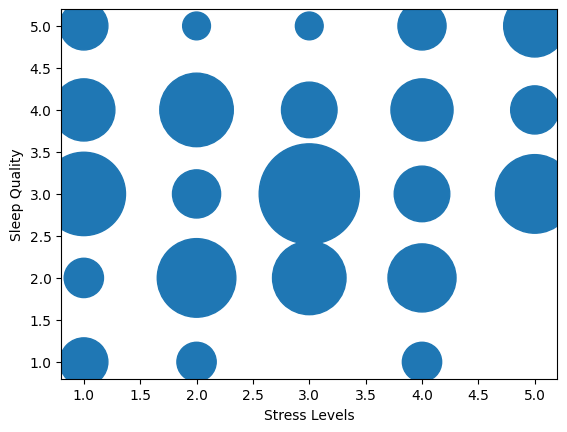

In [61]:
# TODO (1pt)
sleep_quality = df_stustress.groupby(['How would you rate your stress levels?',
                                    'Kindly Rate your Sleep Quality 😴'])
result = sleep_quality.count()
result.index.name = 'Sleep Quality'
ax = result.reset_index().plot.scatter(x='How would you rate your stress levels?', y='Kindly Rate your Sleep Quality 😴',
                                       s = result['how would you rate your study load?'] * 80) # 完全可以直接plot
ax.set_xlabel('Stress Levels')
ax.set_ylabel('Sleep Quality')

### 1.4 使用**至少两种**不同的可视化方法，展示学业表现(academic performance)的分布情况，并使用子图(subplot)进行展示（1pt）

输出仅做参考，你也可以根据个人偏好选择任何其他的可视化方式

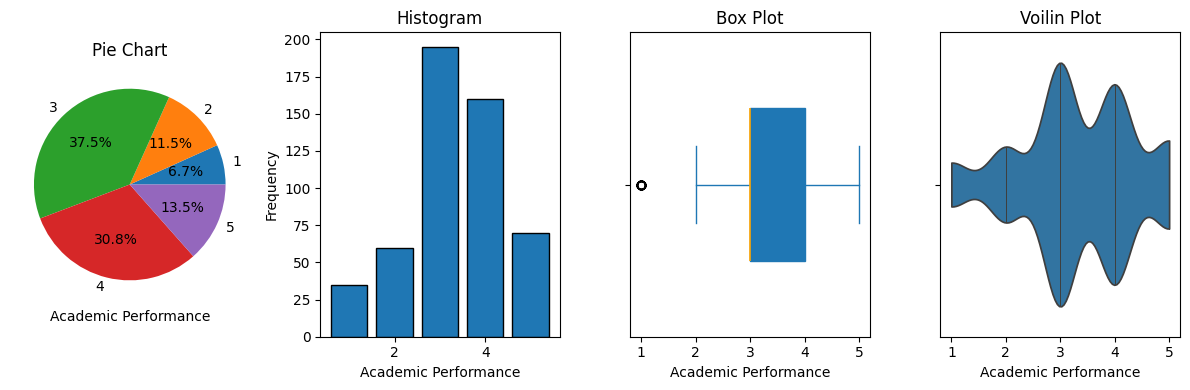

In [62]:
# TODO (1pt)
# 实现得不好
import seaborn

tmp_df_stustress = df_stustress.rename(columns={'How would you rate you academic performance 👩‍🎓?': ''})
# display(tmp_df_stustress)

fig, axes = plt.subplots(1, 4, figsize=(12, 4)) 

fig1 = tmp_df_stustress.groupby(by='').count().iloc[:, 1]
fig1.plot.pie(ax=axes[0], autopct='%1.1f%%', ylabel='')
axes[0].set_title('Pie Chart')
axes[0].set_xlabel('Academic Performance')

bins = range(1, 6 + 1, 1)
fig2 = tmp_df_stustress['']
fig2.plot.hist(ax=axes[1], edgecolor='black', bins=bins, align='left', rwidth=0.8)
axes[1].set_title('Histogram')
axes[1].set_xlabel('Academic Performance')

medianprops = dict(linestyle='-', linewidth=1.2, color='orange')
fig3 = tmp_df_stustress['']
# print(tmp_df_stustress['Academic Performance'])
ax = fig3.plot.box(ax=axes[2], vert=False, patch_artist=True, xticks=[1, 2, 3, 4, 5], widths=0.5, medianprops=medianprops)
# print(ax.get_ylabel())
axes[2].set_title('Box Plot')
axes[2].set_xlabel('Academic Performance')

fig4 = fig3
seaborn.violinplot(fig4, ax=axes[3], orient='h', cut=0, inner='stick')
axes[3].set_title('Voilin Plot')
axes[3].set_xlabel('Academic Performance')

plt.tight_layout()


## 第二部分、主题模型（Topic Model）（6pt）

在这一部分中，我们将借助TF-IDF和Kmeans聚类算法，在[20NewsGroup](http://qwone.com/~jason/20Newsgroups/)数据集上进行文本的主题聚类与关键词提取；原数据集包含分为20类的近20,000条文本，在作业中，为了加快运行效率，同时提高聚类质量和效果，我们从中提取了差异较大的5类主题中的部分数据

本部分中所涉及的算法都是信息检索、数据挖掘等领域的经典技术，它们已经在`scikit-learn`、`nltk`等与机器学习、自然语言处理相关的库中得到了十分完善的实现。
但是在本次作业中，**不允许**使用除下方单元格已经引入之外的其他**第三方**库或库函数；而[**Python标准库**](https://docs.python.org/3/library/index.html)，如`re`、`math`、`collections`、`functools`等，可以视个人需要自由引入与使用

In [63]:
import re
import time
import math
import random
import pandas as pd
import numpy as np
from typing import List, Tuple, Dict
from sklearn.cluster import KMeans
from sklearn import metrics
from wordcloud import WordCloud
from collections import Counter

### 以下代码用于读取数据，你可以通过`info`、`shape`、`head`等函数熟悉数据集基本信息

In [64]:
content_df = pd.read_csv('NewsContent.csv', sep='\t')
category_df = pd.read_csv('NewsCategory.csv', sep='\t')

# You can run the following code to get basic information

print(content_df.info())
display(content_df.head())
display(category_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NewsID   4428 non-null   int64 
 1   Content  4349 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.3+ KB
None


,NewsID,Content
0,83682,I need triangulized data of some nice looking ...
1,69726,"We`ve had the the Great Western, the [ dunno ]..."
2,70195,Does anybody out there have or know how to cal...
3,76948,This is a RFD on a proposal for a newsgroup wh...
4,72758,There was a recent discussion of Dungeons and ...


,NewsID,Category
0,83682,comp.graphics
1,69726,sci.space
2,70195,comp.graphics
3,72758,soc.religion.christian
4,37558,soc.religion.christian


### 2.1 数据预处理（2pt）

#### 2.1.1 表格合并与空值处理（1pt）

`NewsContent.csv`和`NewsCategory.csv`分别存储了文本的内容与它所属的类别，请将两张表根据`NewsID`进行合并，并去除其中的空行，合并后的表格命名为`df`

In [65]:
# TODO (1pt)
df = pd.merge(left=content_df, right= category_df)
df = df.dropna() # 去除含有NaN的行
display(df)

,NewsID,Content,Category
0,83682,I need triangulized data of some nice looking ...,comp.graphics
1,69726,"We`ve had the the Great Western, the [ dunno ]...",sci.space
2,70195,Does anybody out there have or know how to cal...,comp.graphics
3,72758,There was a recent discussion of Dungeons and ...,soc.religion.christian
4,96989,"\nYou could, but it would be considerably chea...",rec.motorcycles
...,...,...,...
4141,97324,\nI knew when I posted that I was going to get...,rec.motorcycles
4142,85016,\n\n\nWell ...\nHave a look at a new journal: ...,sci.space
4143,77871,\n\nThis is a difficult problem for which ther...,talk.politics.misc
4144,77481,"\nIf your distance calc is correct for an ""on ...",rec.motorcycles


#### 2.1.2 文本预处理（1pt）

在基于词频统计的自然语言处理算法中，文本预处理方法会对算法效果产生重大影响。基本的预处理方法包括：
- **转换为小写**，避免在计算词频时因为大小写不同而产生重复计数的情况（这可能会导致一些专用的大写名词与小写单词混淆，但在本次作业中无需考虑）
- **去除标点符号与特殊字符**（非空格空白符、非相应语言的字符、有时也会去除数字等），因为这些字符通常不携带太多有用的语义信息
- **词干提取**，如在英文中将动词的过去形式、进行时形式、名字的复数形式等还原为词干或词根，减少词汇的变体对统计准确性带来的影响
- **标准化**，对于同一单词的不同拼写、词组与缩写等转化为统一形式
- **去除停用词**，即去除文本中频繁出现但通常并不具有实质含义的词语，特别是连接词、冠词、介词等

在本次作业中，你需要实现去除标点符号和去除停用词两种技术，我们已经在`stopwords.py`中提供了一个停用词表供参考；这两种预处理方式在本次作业中已经足够，但你也可以尝试自行加入其他预处理方法以获得更好的效果

In [66]:
from stopwords import ENGLISH_STOP_WORDS
def preprocess(x: str) -> str:
    x = x.lower()

    # -------- Your code starts here --------

    # TODO (1pt)
    x = x.split()
    x = [re.sub(r'[\W\d]', '', word) for word in x] # 去除每个单词中的非字母符号和数字符号
    x = ' '.join([word for word in x if word not in ENGLISH_STOP_WORDS and word != '']) # 处理空词及停用词
    # --------  Your code ends here  --------

    return x
# preprocess('We`ve had the the Great Western, the [ dunno ]')

以下单元格将你的预处理方法作用在数据集上，你可以通过查看单元格输出来验证你的预处理是否达成效果

In [67]:
df['Preprocessed Content'] = df['Content'].apply(preprocess)
display(df.head())

,NewsID,Content,Category,Preprocessed Content
0,83682,I need triangulized data of some nice looking ...,comp.graphics,need triangulized data nice looking model text...
1,69726,"We`ve had the the Great Western, the [ dunno ]...",sci.space,weve great western dunno great northern postul...
2,70195,Does anybody out there have or know how to cal...,comp.graphics,does anybody know calculate rgb values require...
3,72758,There was a recent discussion of Dungeons and ...,soc.religion.christian,recent discussion dungeons dragons role playin...
4,96989,"\nYou could, but it would be considerably chea...",rec.motorcycles,considerably cheaper spend trickle charger kma...


In [68]:
df_len = len(df)
i = random.randint(0, df_len - 1)
print('Raw:', df['Content'].iloc[i], end='\n\n')
print('Processed:', df['Preprocessed Content'].iloc[i])

Raw: 
Suggest McQuires #1 plastic polish.  It will help somewhat but nothing 
will remove deep scratches without making it worse than it already is.
McQuires will do something for fine or light stuff.

Also suggest calling your local plastic shop.  In Calif. "TAP PLASTIC" is
a chain that carries most of what is needed for repair and sometimes
replacement of plastic bits.  Telephone in the Bay area is 415-962-8430.
I'm not sure how amenable they are to shipping.  I have found that they
have several excellent products for cleaning, and removing crap from
windscreens and face shields.  Also they have one called "lift-it" which
works real well in removing sticky stuffs such as adhessives from plastic
wihtout scratching same.

Luck,

Processed: suggest mcquires plastic polish help somewhat remove deep scratches making worse mcquires fine light stuff suggest calling local plastic shop calif tap plastic chain carries needed repair replacement plastic bits telephone bay area im sure amenable s

### 2.2 TF-IDF（2pt）

$\def \r {\mathrm}$
$\def \b {\boldsymbol}$
$\r{TF-IDF}$是一种用于体现单词在文本中权重的指标，它的基本思想在于，给定一个文本集合
- $\r{TF}$：如果某个单词在一段文本中出现次数越多，说明这个单词对于这段文本越重要
- $\r{IDF}$：如果某个单词在整个文本集合中出现的文本数量越少，说明这个单词越能代表它所在文本的特点，因此对于它所出现的文本而言越重要

$\r{TF-IDF}$将两个指标量化相乘，衡量单词在文本中的权重，给定一个含有$n$个文本的集合$\b{D} = \{d_1, \cdots, d_n\}$以及在这些文本中出现的所有单词集合$\b{W} = \{w_1,\cdots,w_m\}$，则$\r{TF-IDF}$是一个$m\times n$的矩阵，矩阵的元素为
$$
\r{TF-IDF}_{ij} = \dfrac{\r{tf}_{ij}}{{\r{tf}_{\cdot j}}}\log\dfrac{\r{df}}{\r{df}_i}
$$
其中$\r{tf}_{ij}$表示单词$w_i$在文本$d_j$中的出现次数，$\r{tf}_{\cdot j}$表示文本$d_j$的总单词数，$\r{df} = n$为文本数，$\r{df}_i$表示包含单词$w_i$的文本数

你的任务是补充`getTFIDF`函数，使得对于给定的文本集`corpus`，输出TFIDF矩阵和对应的单词索引，其中`corpus`是一个列表，列表的每个元素是一个字符串（即一段文本）

In [69]:
def getTFIDF(corpus: List[str]) -> Tuple[np.ndarray, Dict[str, int]]:

    all_words = set()
    for sentence in corpus:
        all_words.update(set(sentence.split()))
    
    num_sentence = len(corpus)
    num_words = len(all_words)

    word2idx = {word:i for i, word in enumerate(all_words)}
    tfidf = np.zeros((num_words, num_sentence))
    # -------- Your code starts here --------
    # TODO: Calculate tfidf.  (2pt)
    # It is hard to do vectorization, so using nested for-loop is ok.

    corpus = list(corpus) # 转换成list，DataFrame下标访问报错
    # 向量化加速运算
    for j in range(num_sentence):
        words = corpus[j].split()
        word_count = Counter(words) # 求出该doc中各个单词的数量
        for word, count in word_count.items():
            if word in word2idx:
                tfidf[word2idx[word]][j] = count / len(words) # 这里计算的是tf
    idf = np.log(num_sentence / np.count_nonzero(tfidf, axis=1))
    tfidf *= idf[:, None]
    
    # --------  Your code ends here  --------

    return tfidf, word2idx

以下是一个小例子，用于检验你实现的正确性，虽然`word2idx`的索引顺序可能会不同，但是按照索引顺序重排后的结果应该与参考输出一致

In [70]:
corpus = [
    "this is the first document",
    "this document is the second document",
    "this the third",
    "is this the first document",
]

tfidf_test, word2idx_test = getTFIDF(corpus)
assert tfidf_test.shape == (7, 4)
assert set(word2idx_test) == {'second', 'third', 'is', 'this', 'the', 'first', 'document'}

print("TFIDF Matrix:")
print(tfidf_test)

print("\nWord to Index Mapping:")
print(word2idx_test)

TFIDF Matrix:
[[0.05753641 0.09589402 0.         0.05753641]
 [0.         0.23104906 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.13862944 0.         0.         0.13862944]
 [0.         0.         0.46209812 0.        ]
 [0.         0.         0.         0.        ]
 [0.05753641 0.04794701 0.         0.05753641]]

Word to Index Mapping:
{'document': 0, 'second': 1, 'the': 2, 'first': 3, 'third': 4, 'this': 5, 'is': 6}


### 2.3 Kmeans聚类（1pt）

In [71]:
# 本单元格运行时间取决于你TFIDF的实现效率，但1min内应该足够跑完
X, word2idx = getTFIDF(df['Preprocessed Content'])
X = X.T # 要聚类的对象是文本而非单词，因此取转置将文本对应维度作为第一维
assert X.shape == (len(df), len(word2idx))
print(X.shape)

(4072, 39982)


在聚类前将TFIDF归一化，你也可以尝试直接使用`X`做聚类，从而对比归一化对聚类结果产生的影响

In [72]:
X_normalized = X / (np.linalg.norm(X, ord=2, axis=1, keepdims=True) + 1e-10)

你的任务是调用scikit-learn中的Kmeans算法，对文本进行聚类，其中类别数目为5，质心初始化方法为Kmeans++，最大迭代次数为100，其他参数可使用默认值或自行设定

In [73]:
n_clusters = 5
t_start = time.time()

# -------- Your code starts here --------

# TODO (1pt)
km_cluster = KMeans(n_clusters, init='k-means++', max_iter=100).fit(X_normalized)

# --------  Your code ends here  --------

print("done in %0.3fs" % (time.time() - t_start))

done in 3.380s


以下代码用于评估你的聚类结果，如果前面的代码实现正常，三个指标至少会在0.4左右

In [74]:
labels = df.Category
def evaluate_kmeans(km: KMeans):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

# 把这里的km_cluster改成你Kmeans对象的变量名
evaluate_kmeans(km_cluster) 

Homogeneity: 0.361
Completeness: 0.497
V-measure: 0.418


### 2.4 关键词提取与可视化（1pt）

在完成聚类后，我们可以提取每一类文本中出现较多的词语作为关键词，这些词语应当能体现出所属类别的文本主题特点

In [75]:
idx2word = {x[1]:x[0] for x in word2idx.items()}
def show_keywords(km):
    centroids = km.cluster_centers_.argsort()[:, ::-1]
    for i in range(n_clusters):
        print("Cluster %d:" % i, end=' ')
        for ind in centroids[i, :10]:
            print(idx2word[ind], end=' ')
        print()

# 把这里的km_cluster改成你Kmeans对象的变量名
show_keywords(km_cluster)

Cluster 0: bike dod ride riding bikes motorcycle just im honda rider 
Cluster 1: thanks graphics image files file program format software email x 
Cluster 2: homosexual gay men homosexuality sex sexual homosexuals heterosexual clayton people 
Cluster 3: space like people think just dont know im time government 
Cluster 4: god jesus church christ faith sin bible believe christian christians 


为了使用词云图进行可视化，我们需要对每一类主题下统计所有单词的权重，请完成`get_frequencies`函数，接受一个`KMeans`对象`km`和聚类索引`cluster_index`，返回一个(单词-权重)的字典，这里权重可以直接使用聚类后的质心坐标

In [76]:
def get_frequencies(km: KMeans, cluster_index: int) -> Dict[str, float]:
    frequencies = dict()
    # -------- Your code starts here --------
    
    # TODO (1pt)

    # 找出属于指定聚类的单词的索引
    indices = np.where(km.labels_ == cluster_index)[0]
    
    # 计算这些数据点的标签频次
    for idx in indices:
        doc = str(list(df['Preprocessed Content'])[idx]).split() # Series -> list -> str
        for word in doc:
            frequencies[word] = km.cluster_centers_[cluster_index][word2idx[word]] # 权重等于该单词在质心坐标中的分量

    # --------  Your code ends here  --------
    return frequencies

以下代码用于绘制词云图，在作业中选取的5种文本主题分别关于计算机图形图像、宇宙太空、基督教、摩托车、政治，你可以对比观察词云图和主题，以此判断聚类算法是否达成效果

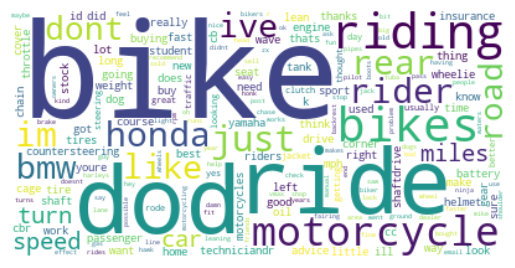

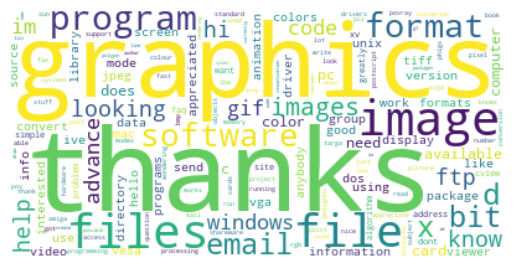

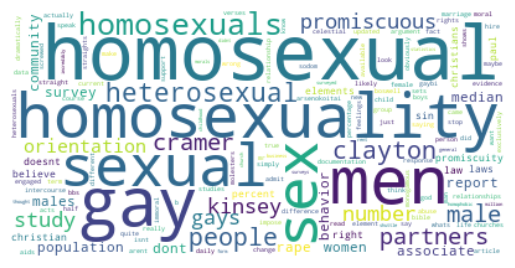

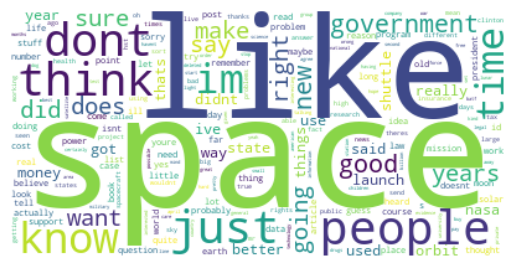

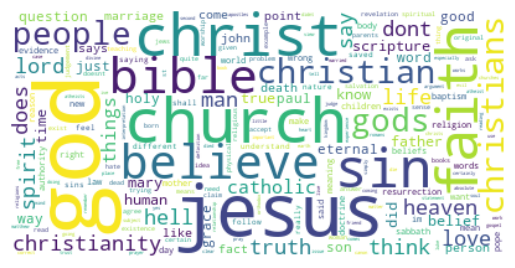

In [77]:
def makewc(frequencies):
    wc = WordCloud(background_color="white")
    wc.generate_from_frequencies(frequencies)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(5):
    freq = get_frequencies(km_cluster, i)
    # print(freq)
    makewc(freq)

## 第三部分、附加题（任选一道，1pt）

### 3.1 LSA模型（1pt）

$\def \b {\boldsymbol}$
$\def \r {\mathrm}$
LSA是一种无监督学习方法，其特点是通过**矩阵分解**发现文本与单词之间的语义联系。给定一个含有$n$个文本的集合$\b{D} = \{d_1, \cdots, d_m\}$以及在这些文本中出现的所有单词集合$\b{W} = \{w_1,\cdots,w_n\}$，我们之前已经建立了一个$\r{TF-IDF}$矩阵用以表示它们的关系，但是这个矩阵既大又稀疏，并不适合直接将其作为特征关系进行处理。我们可以使用LSA算法，对数据进行降维，再对降维后的数据进行聚类分析。

$\def \b {\boldsymbol}$
$\def \r {\mathrm}$
具体而言，一种降维的手段是利用截断奇异值分解，假设$\b{X}$代表$\r{TF-IDF}$矩阵，则可将其分解为
$$
\b{X} \approx \b{U}_k\b{\Sigma}_k\b{V}_k^T
$$
其中$\b{U}_k=[\b{u}_1, \cdots, \b{u}_k] \in \mathbb{R}^{m\times k}$的每一个列向量表示一个话题，$\b{\Sigma}_k$是由前$k$个最大奇异值组成的对角阵，$\left(\b{\Sigma}_k\b{V}_k^T\right)$体现文本在话题空间中的表示

对TFIDF矩阵进行截断分解的代码已经写好，你需要做的是
- 对归一化后的`X_normalized`做截断奇异值分解，并在分解结果上进行聚类、输出聚类指标，聚类参数设置与第二部分中一致，聚类指标应当会比直接使用TFIDF矩阵高0.05~0.1
- 由于数据经过降维，所以我们无法直接通过聚类质心坐标获取对应单词与权重，请实现一个`get_frequencies_lsa`函数，其功能与2.4中`get_frequencies`相似
  - sklearn中的`inverse_transform`可能会对你的实现有所帮助

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

In [79]:
lsa = make_pipeline(TruncatedSVD(n_components=5), Normalizer(copy=False)) # pipeline指定处理流程
t0 = time.time()
# -------- Your code starts here --------

# TODO (0.5pt)
X_lsa = lsa.fit_transform(X_normalized)
km_lsa = KMeans(n_clusters, init='k-means++', max_iter=100).fit(X_lsa)

# --------  Your code ends here  --------
print("done in %0.3fs" % (time.time() - t0))
evaluate_kmeans(km_lsa)

done in 6.339s
Homogeneity: 0.558
Completeness: 0.560
V-measure: 0.559


In [80]:
def get_frequencies_lsa(km: KMeans, cluster_index: int) -> Dict[str, float]:
    frequencies = dict()
    # -------- Your code starts here --------
    
    # TODO (0.5pt)
    centroid = km.cluster_centers_[cluster_index]
    # 质心也在该低维空间中，因此也可以进行逆变换，从而恢复到高维空间
    original_centroid = lsa.named_steps['truncatedsvd'].inverse_transform(centroid.reshape((1, -1)))

    # 找出属于指定聚类的单词的索引
    indices = np.where(km.labels_ == cluster_index)[0]
    
    # 计算这些单词标签的频次
    for idx in indices:
        doc = str(list(df['Preprocessed Content'])[idx]).split()
        for word in doc:
            frequencies[word] = original_centroid[0, word2idx[word]] # 权重为该单词在质心坐标中的分量


    # --------  Your code ends here  --------
    return frequencies

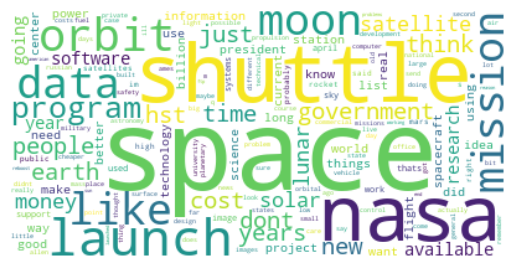

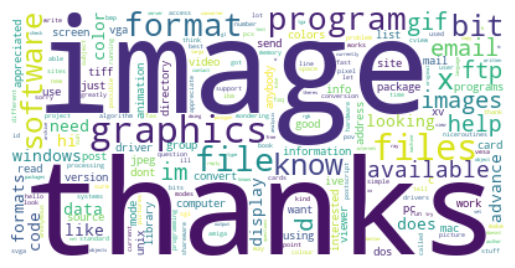

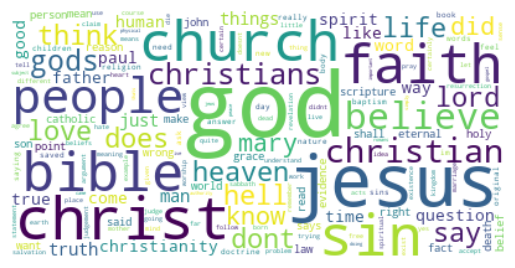

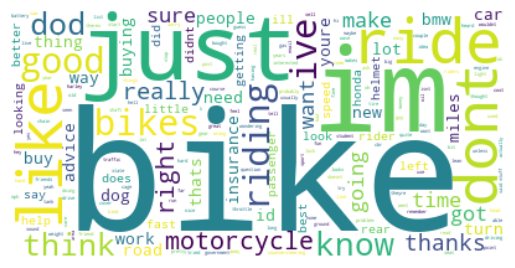

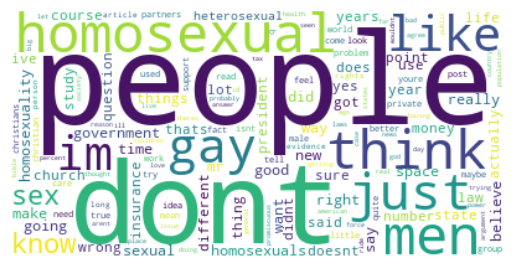

In [81]:
for i in range(5):
    freq = get_frequencies_lsa(km_lsa, i)
    makewc(freq)
    print()

### 3.2 可视化技术（1pt）

目前我们所接触的数据都以一维序列(Series)和二维表(DataFrame)为主，但是实际中的数据表现形式是更为丰富多样的，如流数据/动态数据、场数据、层次化数据、图数据/网状数据、3D数据等，如何对这些数据进行清晰准确以至交互式的呈现是科学可视化领域的重要课题

`matplotlib`对上面提到的一部分数据可视化方法提供了一定的支持，并且在官方文档中给出了函数说明与[应用实例](https://matplotlib.org/stable/plot_types/index.html)，你需要阅读官方文档的函数用法或者对应的实现例子，完成要求的可视化任务

#### 3.2.1 矢量场的流线图 - [`streamplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html#matplotlib.pyplot.streamplot)

考虑在$(-1,0)$位置的一个正电荷和在$(1,0)$位置的一个负电荷，绘制$[-2,2]\times [-2,2]$上的电场线

In [82]:
Y, X = np.mgrid[-2:2:100j, -2:2:100j]

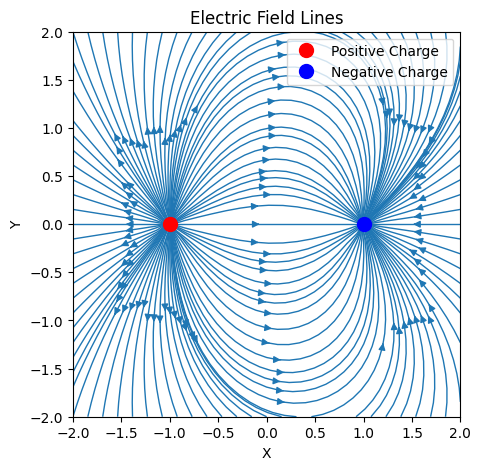

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field(q, r0, x, y):
    '''
    给定电荷q和电荷位置r0，计算在(x,y)处的电场强度分量Ex,Ey
    '''
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    theta = np.arctan2((y - r0[1]), (x - r0[0]))
    Ex = q * np.cos(theta) / (r**2)
    Ey = q * np.sin(theta) / (r**2)
    return Ex, Ey

q1, q2 = 1.5, -1            # 正负电荷量
r0_1 = np.array([-1, 0])    # 正电荷位置
r0_2 = np.array([1, 0])     # 负电荷位置

# -------- Your code starts here -------- 

# TODO (0.5pt)
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Ex1, Ey1 = electric_field(q1, r0_1, X, Y)
Ex2, Ey2 = electric_field(q2, r0_2, X, Y)
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2

plt.figure(figsize=(5, 5))
plt.streamplot(X, Y, Ex, Ey, density=0.9, linewidth=1, broken_streamlines=False)
plt.plot(r0_1[0], r0_1[1], 'o', markersize=10, color='red', label='Positive Charge')
plt.plot(r0_2[0], r0_2[1], 'o', markersize=10, color='blue', label='Negative Charge')
plt.title('Electric Field Lines')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.legend()
plt.show()

# --------- Your code ends here ---------


#### 3.2.2 三维曲面绘制 - [`plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface)

绘制一个克莱因瓶，形状由以下的参数方程给出
$$
\begin{aligned}
x = & \begin{cases}
3\cos(u)(1+\sin(u)) + (2-\cos(u))\cos(v)\cos(u) & 0 \leq u < \pi \\
3\cos(u)(1+\sin(u)) - (2-\cos(u))\cos(v) & \pi \leq u < 2\pi
\end{cases} \\
y = & \begin{cases}
8\sin(u) + (2-\cos(u))\sin(u)\cos(v) & 0\leq u < \pi \\
8\sin(u) & \pi \leq u < 2\pi
\end{cases}\\
z=&(2-\cos(u))\sin(v)
\end{aligned}
$$
其中$(u,v)\in [0,2\pi)\times [0,2\pi)$是参数

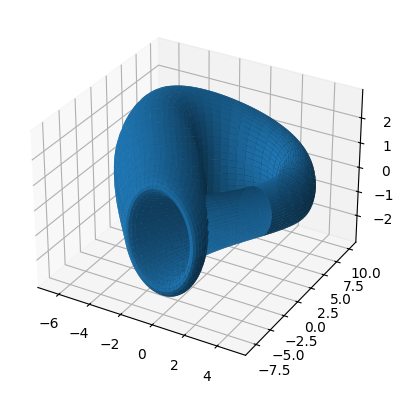

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def surf(u, v):
    '''
    给定参数(u,v)，返回相应的(x,y,z)
    '''
    halfu = (0 <= u) & (u < np.pi)
    r = (2 - np.cos(u))

    x = 3 * np.cos(u) * (1 + np.sin(u)) - r * np.cos(v)
    x[halfu] = (3 * np.cos(u) * (1 + np.sin(u)) + r * np.cos(u) * np.cos(v))[halfu]

    y = 8 * np.sin(u)
    y[halfu] = (8 * np.sin(u) + r * np.sin(u) * np.cos(v))[halfu]

    z = r * np.sin(v)
    return x, y, z


# -------- Your code starts here --------

# TODO (0.5pt)
u, v = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
U, V = np.meshgrid(u, v)
X, Y, Z = surf(U, V)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

# --------- Your code ends here ---------